## Eigenfunktionen

### Zeichnen der Radialteile

Folgende Orbitalwellenfunktionen sind gegeben:

$$
\begin{aligned}
1s && \psi_{100} = N_{100} e^{-r/a_0} \\
2s && \psi_{200} = N_{200} e^{-r/2a_0} a_0^{-3/2} \left(2 - \frac{r}{a_0} \right) \\
2p_x && \psi_{211}=\sqrt{\frac{3}{4 \pi}} \frac{1}{2 \sqrt{6}} a_{0}^{-3 / 2} \frac{r}{a_{0}} e^{-r / 2 a_{0}} \sin(\theta) \cos(\varphi) \\
2p_y && \psi_{21-1}=\sqrt{\frac{3}{4 \pi}} \frac{1}{2 \sqrt{6}} a_{0}^{-3 / 2} \frac{r}{a_{0}} e^{-r / 2 a_{0}} \sin(\theta) \cos(\varphi)\\
2p_z && \psi_{210}=N_{210} \frac{r}{a_{0}} e^{-r / 2 a_{0}} \cos(\theta)
\end{aligned}
$$


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import sph_harm, genlaguerre, factorial
from ipywidgets import interact, widgets

plt.xkcd()
plt.style.use("seaborn-ticks")
plt.rcParams["legend.handlelength"] = 0.8
plt.rcParams["legend.framealpha"] = 0.8
plt.rcParams.update({"font.size": 12})

r = np.linspace(0, 30, 1000)
Z   = 1  # Anzahl der Elementarladungen
a_0 = 1. # Bohrscher Atomradius
l = 0

def R(n, l, r):
    """Radialfunktion"""
    Z_n = 2*Z/(n*a_0)
    root = np.sqrt(Z_n**3 * factorial(n-l-1)/(2*n*factorial(n+l)))
    rho = Z_n * r
    L = np.polyval(genlaguerre(n-l-1, 2*l+1), rho)
    return root * np.exp(-0.5*rho) * rho**l * L

w = widgets.IntSlider(value=1, min=1, max=5, step=1)

def plot_radial_function(n=(1,5,1)):
    fig, axes = plt.subplots(1,1, figsize=(8,4))
    axes.plot(r, R(n, l, r))
    axes.set_xlabel("Radius $r$")
    axes.set_ylabel("Radialfunktion $R(r)$")
    axes.set_yticks([])
    axes.fill_between(r, (R(n,l,r) > 0)* R(n,l,r), color="crimson", alpha=0.5)
    axes.fill_between(r, (R(n,l,r) < 0)* R(n,l,r), color="royalblue", alpha=0.5)

interact(plot_radial_function, n=w)   

interactive(children=(IntSlider(value=1, description='n', max=5, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.plot_radial_function(n=(1, 5, 1))>

- Radiale Knoten sind Nulldurchgänge für $r>0$. In drei Dimensionen handelt es sich dabei um Kugelflächen.
- $r=0$ ist kein Knotenpunkt im strengen Sinne, obwohl die Wellenfunktion auch dort ihr Vorzeichen wechselt (allerdings im winkelabhängigen Teil). Dort ist die Wellenfunktion nicht stetig differenzierbar aufgrund des Coulomb-Potentials.
- Extremwerte (Minima und Maxima der Aufenthaltswahrscheinlichkeit) können durch Nullsetzen der ersten Ableitung bestimmt werden.


### Zeichnen der Winkelanteile

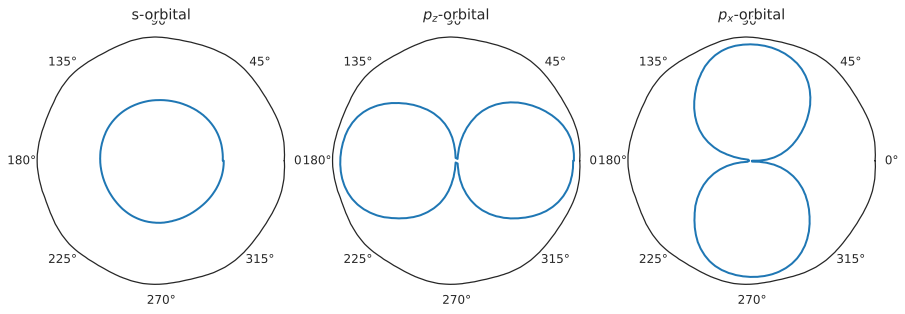

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.xkcd()
plt.style.use("seaborn-ticks")
plt.rcParams["legend.handlelength"] = 0.8
plt.rcParams["legend.framealpha"] = 0.8
plt.rcParams.update({"font.size": 12})

def Y00(theta):
    return np.sqrt(1/np.pi) * (np.cos(theta)**2 + np.sin(theta)**2 )

def Y10(theta):
    return  np.cos(theta) * np.sqrt(3/(4*np.pi))

def Y1n1(theta):
    return  np.sin(theta) * np.sqrt(3/(8*np.pi)) * np.sin(np.pi/2)

thets = np.linspace(0, 2, 100) * np.pi
r = thets

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1, projection='polar')
ax.plot(thets+(r<0)*np.pi, np.abs(Y00(thets)))
ax.set_rticks([])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.title.set_text("s-orbital")

ax = plt.subplot(1, 3, 2, projection='polar')
ax.plot(thets+(r<0)*np.pi, np.abs(Y10(thets)))
ax.set_rticks([])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.title.set_text("$p_z$-orbital")

ax = plt.subplot(1, 3, 3, projection='polar')
ax.plot(thets+(r<0)*np.pi, np.abs(Y1n1(thets)))
ax.set_rticks([])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.title.set_text("$p_x$-orbital")

plt.show()

- das $p_y$-Orbital wäre entlang $\varphi$ gedreht und ist daher etwas schwer zu zeichnen
- die angulären Knoten liegen bei $r=0$. Diese sind in drei Dimensionen Ebenen.

### Normierungskonstanten

Normierungskonstante $N_{100}$:

$$
\begin{aligned}
\psi_{100} &= N_{100} e^{-r/a_0} \\
\text{Normierungsbedingung: } & \int_{-\infty}^\infty \left( N_{100} e^{-r/a_0} \right)^2 d\tau = 1
\end{aligned}
$$

Es bietet sich die Transformation zu Kugelkoordinaten an:

$$
\begin{aligned}
1 &= N_{100}^2 \int_{-\infty}^\infty \int_{-\infty}^\infty \int_{-\infty}^\infty e^{-2r/a_0} dx dy dz \\
1 &= N_{100}^2 \int_{0}^\pi \int_{0}^{2\pi} \int_{0}^\infty e^{-2r/a_0}
\underbrace{r^2 \sin(\theta)}_{\text{Jacobi-Determinante}} dr d\theta d\varphi \\
1 &= N_{100}^2 \underbrace{\int_{0}^{2\pi} d\varphi}_{=2\pi} ~\cdot~
\underbrace{\int_{0}^{\pi} \sin(\theta) d\theta}_{=\left[- \cos(\theta) \right]^{\pi}_0} ~\cdot~
\underbrace{\int_{0}^\infty e^{-2r/a_0} r^2 dr}_{\text{siehe Hilfestellung}} \\
N_{100} &= \sqrt{\frac{1}{\pi a_0^3}}
\end{aligned}
$$

$$
\begin{aligned}
\text{Hilfestellung: }& ~\int_0^\infty x^n e^{-ax}dx = \frac{n!}{a^{n+1}}
\end{aligned}
$$

---
Normierungskonstante $N_{210}$:

$$
\begin{aligned}
1 &= N_{210}^2 \int_{0}^\pi \int_{0}^{2\pi} \int_{0}^\infty \left(\frac{r}{a_0} e^{-r/2a} \cos(\theta)\right)^2 r^2 \sin(\theta) dr d\theta d\varphi \\
1 &= N_{210}^2 \frac{1}{a_0^2} 
\int_{0}^{2\pi} d\varphi \int_{0}^{\pi} \sin(\theta) \cos(\theta)^2 d\theta \int_{0}^\infty r^4 e^{-r/a_0} dr \\
N_{210} &= \sqrt{ \frac{3}{4 \pi}} \frac{1}{2 \cdot \sqrt{6}} a^{-3/2} 
\end{aligned}
$$

$$
\begin{aligned}
\text{Hilfestellung: }& ~\int \sin(\theta) \cos(\theta)^2 d\theta = \frac{-1}{3} \cos^3(\theta)
\end{aligned}
$$

### Orthogonalität und Orthonormalität

#### Orthogonalität von 1s/2s:

Das 1s- und 2s-Orbital haben dieselbe Kugelflächenfunktion $Y_{l=0, m=0}(\theta, \varphi)$. Sie unterscheiden sich aber im Radialteil:

$$
\begin{aligned}
0 &= \int \psi_{100} \psi_{200} d\tau \\
0 &= \frac{a_0^{-3/2}}{\sqrt{\pi}} \frac{a_0^{-3/2}}{\sqrt{4\pi}} \frac{1}{2\sqrt{2}}
\int e^{-r/a_0} \cdot e^{-r/2a_0} \left(2 - \frac{r}{a_0} \right) d\tau \\
0 &= \frac{a_0^{-3}}{4\pi\sqrt{2}}
\int_0^{2\pi} \int_0^\pi \int_0^\infty e^{-3r/2a_0} \left(2 - \frac{r}{a_0} \right) r^2 \sin(\theta) dr d\theta d\varphi \\
0 &= \frac{a_0^{-3}}{\sqrt{2}} 
\left[\frac{4 a_0^3}{\left(\frac{3}{2}\right)^3} - 
\frac{4 a_0^3}{\left(\frac{3}{2}\right)^3} \right]
~~ \checkmark
\end{aligned}
$$

Generell sind alle Radialfunktionen zueinander orthogonal, das heißt, ihr Überlappungsintegral mittelt sich zu 0 heraus. Das gilt zum Beispiel auch für das Überlappungsintegral der Radialfunktionen von 1s und 2p, zusätzlich zur Orthogonalität der Kugelflächenfunktionen.

#### Orthogonalität der Kugelflächenfunktionen von 1s/2p$_z$

Es ist eine Eigenschaft der Kugelflächenfunktionen, immer zueinander orthogonal zu sein. Dies lässt sich auch sehr einfach zeigen:

$$
\begin{aligned}
0 &= \int \psi_{100} \psi_{210} d\tau \\
0 &= N_{100} N_{210} \int_0^\infty R_{100}(r) R_{210}(r) r^2 dr
\int_0^{2\pi} d\varphi \underbrace{\int_0^\pi \cos(\theta) \sin(\theta) d\theta}_{=0}
\end{aligned}
$$

## Visualisierung von Orbitalen

Die Visualisierung von Orbitalen ist schwierig, da es sich bei den Kugelflächenfunktionen $Y_{lm}(\theta, \phi)$ um komplexe Funktionen handelt. Die Funktionen sind nur real, wenn $m=0$. Es ist einfacher, daher nur die Aufenthaltswahrscheinlichkeit $|\Psi_{n,l,m}(r, \theta, \phi)|^2$ zu visualisieren, was Sie anhand des folgenden Widgtes machen können:

- Visualisieren Sie die Aufenthaltswahrscheinlichkeit der $p$-Orbitale für $n=2$ und $m=-1,0,1$. Was fällt Ihnen auf?
- Visualisieren Sie die Aufenthaltswahrscheinlichkeit der $d$-Orbitale.

In [3]:
%matplotlib inline
import numpy as np
from numpy import cos, pi
import math
from ipywidgets import interact
import plotly.graph_objects as go
from scipy.special import sph_harm, genlaguerre, factorial
from matplotlib import cm, colors

Z   = 1  # Anzahl der Elementarladungen
a_0 = 1. # Bohrscher Atomradius

def R(n,l, r):
    """Radialfunktion"""
    Z_n = 2*Z/(n*a_0)
    root = np.sqrt(Z_n**3 * factorial(n-l-1)/(2*n*factorial(n+l)))
    rho = Z_n * r
    L = np.polyval(genlaguerre(n-l-1, 2*l+1), rho)
    return root * np.exp(-0.5*rho) * rho**l * L

def psi(n,l,m,r,theta,phi):
    """de.wikipedia.org/wiki/Wasserstoffatom#Mathematische_Details"""
    R_nl = R(n,l, r)
    Y_lm = sph_harm(m,l,phi,theta) 
    return R_nl * Y_lm

def show_figure(n=1, l=0, m=0):
    plot_range = (4 *n + 4*l) * a_0 * 1.5
    x     = np.linspace(-plot_range,plot_range,50)
    y     = np.linspace(-plot_range,plot_range,50)
    z     = np.linspace(-plot_range,plot_range,50)
    x,y,z = np.meshgrid(x,y,z)
    r     = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(np.sqrt(x**2+y**2), z )
    phi   = np.arctan2(y, x)
    print("Die Visualisierung kann ein paar Sekunden in Anspruch nehmen.")
    if not l in range(-n+1, n):
        print("Die Quantenzahl $l$ muss zwischen -n+1 und n-1 liegen.")
        return None
    if not m in range(-l, l+1):
        print("Die Quantenzahl $m$ muss zwischen -l und +l liegen.")
        return None
    Psi = psi(n,l,m,r,theta,phi)
    Psi2 = np.real(Psi * Psi.conj())
    fig = go.Figure(data=go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=Psi2.flatten(),
        isomin=0,
        isomax=np.max(Psi2.flatten()) / 100,
        opacity=0.5,
        surface_count=1,
        colorscale="Reds",
        caps=dict(x_show=False, y_show=False, z_show=False),    
        ),
        layout=go.Layout(
        title={"text":r"$|\Psi_{{{}{}{}}}(r, \theta, \phi)|^2$".format(n, l, m)}))
    fig.show()

interact(show_figure, n=(1,3,1), l=(0,2,1), m=(-2,2,1))

interactive(children=(IntSlider(value=1, description='n', max=3, min=1), IntSlider(value=0, description='l', m…

<function __main__.show_figure(n=1, l=0, m=0)>

Sie wurden vermutlich bereits mit Darstellungen von Orbitalen konfrontiert, die **nicht** der hier gezeigten Darstellung der Aufenthaltswahrscheinlichkeit entsprechen.

Bei Orbitalen mit $m \neq 0$ ist die Aufenthaltswahrscheinlichkeit in der $xy$-Ebene überall gleich. Dies kommt aus der radialen Symmetrie der Kugelflächenfunktionen und macht physikalisch Sinn.

Um die $p_x$- und $p_y$-Orbitale zu visualisieren, so wie Sie diese aus dem Chemie-Grundkurs kennen, müssen sie **Superpositionen** der komplexen Orbitale bilden:

$$
\begin{aligned}
\Psi_{p_x} &= \frac{i}{\sqrt{2}} \cdot (\psi_{2, 1, 1} + \psi_{2, 1, -1})\\
\Psi_{p_y} &= -\frac{1}{\sqrt{2}} \cdot (\psi_{2, 1, 1} - \psi_{2, 1, -1})
\end{aligned}
$$

- Überzeugen Sie sich davon, dass diese Superpositionen $\in \mathbb{R}$ sind.

Diese Darstellung lässt sich aus zwei Gründen motivieren:
- Eine Superposition von zwei Lösungen der SG ist ebenfalls eine Lösung der SG (Linearität).
- In molekularen Systemen werden die Superpositionen aller Orbitale gebildet (siehe MO-Theorie).
   
Mit dem folgenden Widget können Sie diese Darstellung der $p$-Orbitale visualisieren. Achten Sie dabei auf das Vorzeichen der Wellenfunktion.

- Erhöhen Sie die Hauptquantenzahl $n$ und achten Sie auf die zusätzlichen Vorzeichenwechsel der Wellenfunktion durch die Knotenflächen der Radialfunktion.
- Zur Übung, bestimmen Sie die Knoten der Radialfunktionen.

In [4]:
%matplotlib inline
import numpy as np
from numpy import cos, pi
import math
from ipywidgets import interact
import plotly.graph_objects as go
from scipy.special import sph_harm, genlaguerre, factorial
from matplotlib import cm, colors
from plotly.subplots import make_subplots

Z   = 1  # Anzahl der Elementarladungen
a_0 = 1. # Bohrscher Atomradius

def R(n,l, r):
    """Radialfunktion"""
    Z_n = 2*Z/(n*a_0)
    root = np.sqrt(Z_n**3 * factorial(n-l-1)/(2*n*factorial(n+l)))
    rho = Z_n * r
    L = np.polyval(genlaguerre(n-l-1, 2*l+1), rho)
    return root * np.exp(-0.5*rho) * rho**l * L

def psi(n,l,m,r,theta,phi):
    """de.wikipedia.org/wiki/Wasserstoffatom#Mathematische_Details"""
    R_nl = R(n,l, r)
    Y_lm = sph_harm(m,l,phi,theta) 
    return R_nl * Y_lm

def show_figure(n=2):
    plot_range = (4*n + 4*1) * a_0 * 2.5
    x     = np.linspace(-plot_range,plot_range,50)
    y     = np.linspace(-plot_range,plot_range,50)
    z     = np.linspace(-plot_range,plot_range,50)
    x,y,z = np.meshgrid(x,y,z)
    r     = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(np.sqrt(x**2+y**2), z )
    phi   = np.arctan2(y, x)

    p1 = psi(n,1,1,r,theta,phi)
    p2 = psi(n,1,-1,r,theta,phi)
    Psi_x = np.real(1j/np.sqrt(2) * (p1 + p2))
    Psi_y = np.real(-1/np.sqrt(2) * (p1 - p2))

    fig = make_subplots(rows=1, cols=2,
                        specs=[[{"type":"Isosurface"},{"type":"Isosurface"}]],
                       subplot_titles=(r"$\Psi_{p_x}$", r"$\Psi_{p_y}$"))

    fig.add_trace(go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=Psi_x.flatten(),
        isomin=np.min(Psi_x.flatten())/100,
        isomax=np.max(Psi_x.flatten())/100,
        opacity=0.3,
        surface_count=2,
        colorscale="RdBu",
        caps=dict(x_show=False, y_show=False, z_show=False),    
        ), row=1, col=1)

    fig.add_trace(go.Isosurface(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        value=Psi_y.flatten(),
        isomin=np.min(Psi_y.flatten())/100,
        isomax=np.max(Psi_y.flatten())/100,
        opacity=0.3,
        surface_count=2,
        colorscale="RdBu",
        caps=dict(x_show=False, y_show=False, z_show=False),    
        ), row=1, col=2)

    fig.show()

interact(show_figure, n=(2,4,1))

interactive(children=(IntSlider(value=2, description='n', max=4, min=2), Output()), _dom_classes=('widget-inte…

<function __main__.show_figure(n=2)>